<a href="https://colab.research.google.com/github/ankay212000/Data-Mining-and-Analysis-Practical/blob/main/Exercise8_UE183065.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read NIRF data as given in Dataset tab on Google Classroom.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
cd /content/gdrive/My Drive/DMA Datasets

/content/gdrive/My Drive/DMA Datasets


In [10]:
ls

'nirf_engg_ranking_india_2020 (1).csv'     nirf_engg_ranking_india_2020.xls
 nirf_engg_ranking_india_2020.csv.gsheet   OnlineRetail.csv


In [40]:
import pandas as pd
df = pd.read_csv("nirf_engg_ranking_india_2020 (1).csv")

In [41]:
df

,institute_ida,name,link,tlr,rpc,go,oi,perception,city,state,score,rank
0,IR-E-U-0456,Indian Institute of Technology Madras,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,95.42,94.64,83.90,61.31,100.00,Chennai,Tamil Nadu,89.93,1
1,IR-E-I-1074,Indian Institute of Technology Delhi,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,90.79,96.15,80.36,64.81,94.46,New Delhi,Delhi,88.08,2
2,IR-E-U-0306,Indian Institute of Technology Bombay,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,91.00,93.37,77.60,49.99,92.51,Mumbai,Maharashtra,85.08,3
3,IR-E-I-1075,Indian Institute of Technology Kanpur,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,86.22,82.08,88.44,54.21,85.78,Kanpur,Uttar Pradesh,82.18,4
4,IR-E-U-0573,Indian Institute of Technology Kharagpur,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,77.32,87.11,83.21,56.62,89.31,Kharagpur,West Bengal,80.56,5
...,...,...,...,...,...,...,...,...,...,...,...,...
195,IR-E-C-42227,Dr. D. Y. Patil Institute of Technology,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,49.69,1.66,53.63,48.50,1.63,Pune,Maharashtra,31.15,196
196,IR-E-C-49660,Pimpri Chinchwad College of Engineering,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,46.11,7.36,50.73,48.76,0.55,Pune,Maharashtra,31.13,197
197,IR-E-C-34167,Ramrao Adik Institute of Technology,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,53.60,3.82,45.75,47.25,0.00,Navi Mumbai,Maharashtra,31.11,198
198,IR-E-C-48145,BVRIT Hyderabad,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,49.16,0.46,53.74,52.98,1.63,Hyderabad,Telangana,31.10,199


# Group the data statewise and Count the number of colleges in each state.

In [44]:
df.groupby(['state']).agg(['count'])['institute_ida']

,count
state,
Andhra Pradesh,10
Arunachal Pradesh,2
Assam,3
Bihar,2
Chandigarh,2
Chhattisgarh,1
Delhi,7
Goa,1
Gujarat,7


#  Sort the records based on rpc attribute (Research Professional practices).

In [45]:
df2=df.sort_values(by="rpc")
df2

,institute_ida,name,link,tlr,rpc,go,oi,perception,city,state,score,rank
198,IR-E-C-48145,BVRIT Hyderabad,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,49.16,0.46,53.74,52.98,1.63,Hyderabad,Telangana,31.10,199
146,IR-E-C-1345,P E S College of Engineering,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,59.25,0.71,51.11,54.45,0.00,Mandya,Karnataka,33.65,147
186,IR-E-C-26162,Vasavi College of Engineering,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,48.80,0.75,56.58,50.47,2.16,Hyderabad,Telangana,31.46,187
185,IR-E-C-1398,BNM Institute of Technology,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,55.66,1.11,46.87,50.80,0.00,Bengaluru,Karnataka,31.48,186
189,IR-E-C-26905,G.Pulla Reddy Engineering College,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,53.11,1.15,48.27,51.60,2.69,Kurnool,Andhra Pradesh,31.35,190
...,...,...,...,...,...,...,...,...,...,...,...,...
3,IR-E-I-1075,Indian Institute of Technology Kanpur,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,86.22,82.08,88.44,54.21,85.78,Kanpur,Uttar Pradesh,82.18,4
4,IR-E-U-0573,Indian Institute of Technology Kharagpur,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,77.32,87.11,83.21,56.62,89.31,Kharagpur,West Bengal,80.56,5
2,IR-E-U-0306,Indian Institute of Technology Bombay,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,91.00,93.37,77.60,49.99,92.51,Mumbai,Maharashtra,85.08,3
0,IR-E-U-0456,Indian Institute of Technology Madras,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,95.42,94.64,83.90,61.31,100.00,Chennai,Tamil Nadu,89.93,1


# Find the rank of Panjab University as per rpc attribute.

In [46]:
df2=df2.reset_index(drop=True)
pu_rpc=df2.loc[df2['name'] == "Panjab University"]
print("Rank of Panjab University based on rpc attribute: ",pu_rpc.index.values[0]+1)

Rank of Panjab University based on rpc attribute:  175


# List the colleges whose rpc value is less than Panjab University and rank is higher(rank value is less).

In [47]:
rpc_pu=list(df.loc[df['name']=="Panjab University"]['rpc'])
rank_pu=list(df.loc[df['name']=="Panjab University"]['rank'])
rpc_pu=rpc_pu[0]
rank_pu=rank_pu[0]

In [48]:
df.loc[(df['rank'] < rank_pu) & (df['rpc'] < rpc_pu)]

,institute_ida,name,link,tlr,rpc,go,oi,perception,city,state,score,rank
18,IR-E-U-0025,National Institute of Technology Warangal,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,73.38,38.12,74.21,57.81,36.91,Warangal,Telangana,57.76,19
21,IR-E-U-0355,Indian Institute of Technology Bhubaneswar,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,77.05,37.17,64.77,56.27,39.56,Bhubaneswar,Odisha,56.80,22
22,IR-E-U-0263,National Institute of Technology Calicut,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,71.05,31.30,78.29,63.87,38.04,Kozhikode,Kerala,56.56,23
23,IR-E-U-0139,Indian Institute of Technology Gandhinagar,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,83.76,34.55,55.15,57.90,38.26,Gandhinagar,Gujarat,56.15,24
24,IR-E-U-0378,Indian Institute of Technology Ropar,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,79.11,30.54,70.31,59.24,30.75,Rupnagar,Punjab,55.95,25
25,IR-E-U-0064,Indian Institute of Technology Patna,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,78.20,39.24,62.28,51.86,28.57,Patna,Bihar,55.74,26
29,IR-E-U-0391,Birla Institute of Technology & Science,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,61.95,34.87,77.36,56.26,42.47,Pilani,Rajasthan,54.39,30
30,IR-E-U-0184,Indian Institute of Technology Mandi,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,70.38,36.80,67.11,64.70,21.26,Mandi,Himachal Pradesh,54.17,31
32,IR-E-U-0255,Indian Institute of Space Science and Technology,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,78.65,24.02,62.88,62.97,33.32,Thiruvananthapuram,Kerala,53.01,33
33,IR-E-U-0363,Siksha `O` Anusandhan,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,74.73,29.41,68.18,64.26,10.70,Bhubaneswar,Odisha,52.38,34


# Draw the Histogram for colleges based on tlr values by dividing the overall data in 10 bins.

In [49]:
tlr_values=df['tlr'].tolist()

In [50]:
for i in range(len(tlr_values)):
  tlr_values[i]=float(tlr_values[i])

In [61]:
max_tlr=max(tlr_values)
min_tlr=min(tlr_values)
width=(max_tlr-min_tlr)/10
bins=[]

bins.append(min_tlr)
for i in range(1,10):
  bins.append(min_tlr+i*width) 

bins.append(max_tlr)  

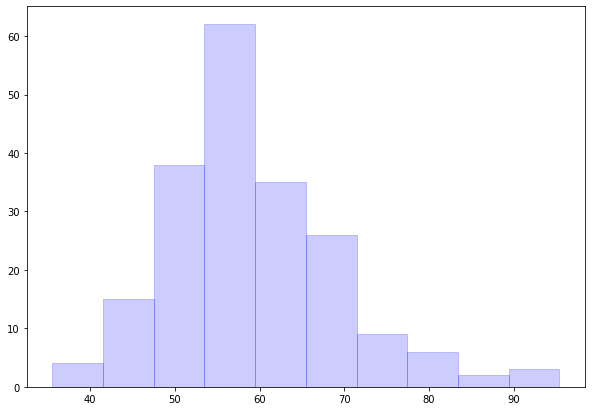

In [62]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(tlr_values, bins = bins,color = 'b', alpha = 0.2, edgecolor = 'b')
plt.show()